# Prediction of NBA fantasy scores

**Walid Bounouar, 8917791**  
**Thomas Charette, 8475447**

This notebook is an experiment to see if we could use machine learning models to predict the fantasy production of NBA players. We plan on comparing two techniques, a MLP regressor and a decision tree regressor.  

Credit to https://www.kaggle.com/jwals96/nba-201718-stats-and-fantasy-scores for the dataset we plan on using.

Before running, pleas install the packages
- pandas
- numpy
- requests
- sklearn
- datetime
- matplotlib
- pickle
- prettytable

## Table of contents

- <a href="#Preparing-the-data">Preparing the data</a>
  - <a href="#Ingesting-and-interpreting-the-dataset">Ingesting and interpreting the dataset</a>
  - <a href="#Remodeling-the-dataset">Remodeling the dataset</a>
    - <a href="#Creating-the-Version-1-dataset:-Original-dataset">Creating the Version 1 dataset: Original dataset</a>
    - <a href="#Creating-the-Version-2-dataset:-Lightweight-dataset">Creating the Version 2 dataset: Lightweight dataset</a>
    - <a href="#Creating-the-Version-3-dataset:-Fully-custom">Creating the Version 3 dataset: Fully custom</a>
  - <a href="#Finalizing-the-datasets">Finalizing the datasets</a>
- <a href="#Basic-approach">Basic approach</a>
  - <a href="#Prediction---Basic-approach">Prediction - Basic approach</a>
  - <a href="#Evaluation---Basic-approach">Evaluation - Basic approach</a>
- <a href="#Multilayer-Perceptron">Multilayer Perceptron</a>
  - <a href="#Training---MLP">Training - MLP</a>
  - <a href="#Prediction---MLP">Prediction - MLP</a>
  - <a href="#Evaluate---MLP">Evaluate - MLP</a>
  - <a href="#Experimenting-with-hyperparameters---MLP">Experimenting with hyperparameters - MLP</a>
- <a href="#Another-dataset">Another dataset</a>
- <a href="#Regression-Decision-Tree">Regression Decision Tree</a>
  - <a href="#Prediction---Regression-Tree">Prediction - Regression Tree</a>
  - <a href="#Evaluate---Regression-Tree">Evaluate - Regression Tree</a>
  - <a href="#Experimenting-with-hyperparameters---Regression-Tree">Experimenting with hyperparameters - Regression Tree</a>
  - <a href="#Prediction-with-Optimized-Model---Regression-Tree">Prediction with Optimized Model - Regression Tree</a>
  - <a href="#Exporting-the-trees">Exporting the trees</a>
- <a href="#Discussion">Discussion</a>
- <a href="#Conclusion">Conclusion</a>
- <a href="#References">References</a>

## Preparing the data

### Ingesting and interpreting the dataset

We'll start by simply using pandas to read our `.csv` file containing the dataset.  
Our dataset is made up of many features, such as: 
- Player season averages (points, rebounds, assists, shooting percentage, etc.)
- Information about specific game (date, home team, etc.)
- Information about the opponent.
- The players fantasy score.
Every example in our dataset corresponds to a player's fantasy production for a specific game.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_raw = pd.read_csv("NBA Stats Database - Player Game Stats 2017 (1).csv")
dataset_raw.head(5)

,Name,Position,(NBAS Team),(BBref Team),DK Team,(Team),(vs.),(NBAS Opponent),(BBref Opponent),DK Opponent,...,Player FT%,Player ORB,Player DRB,Player TRB,Player AST,Player STL,Player BLK,Player TOV,Player PF,Player PS/G
0,Aaron Brooks,PG,MIN,MIN,Min,MIN,vs.,IND,IND,Ind,...,0.727,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
1,Aaron Brooks,PG,MIN,MIN,Min,MIN,@,DET,DET,Det,...,0.727,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
2,Aaron Brooks,PG,MIN,MIN,Min,MIN,@,GSW,GSW,GS,...,0.727,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
3,Aaron Brooks,PG,MIN,MIN,Min,MIN,vs.,CHA,CHO,Cha,...,0.727,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
4,Aaron Brooks,PG,MIN,MIN,Min,MIN,@,DAL,DAL,Dal,...,0.727,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3


Let's explore our data just to have a better idea of what is available to us.

In [3]:
#columns
print("All columns in the dataset:")
print(list(dataset_raw))
print()

# Shape of the dataset
print("Number of examples in the dataset: ", dataset_raw.shape[0])
print("Number of columns in the dataset: ", dataset_raw.shape[1])
print()

# Information about each column
'''
for column in list(dataset_raw):
    print(dataset_raw[column].value_counts())
    print()
'''

All columns in the dataset:
['Name', 'Position', '(NBAS Team)', '(BBref Team)', 'DK Team', '(Team)', '(vs.)', '(NBAS Opponent)', '(BBref Opponent)', 'DK Opponent', 'Home', 'Match Up', 'Date', 'Min', '(Double digit stats)', '(Unadj Pts)', 'DK Points Scored', 'Team Points ', 'Player Avg Pts/min', 'Team Avg Pace', 'Opponent Avg Pace', 'Team FG', 'Team FGA', 'Team FG%', 'Team 3P', 'Team 3PA', 'Team 3P%', 'Team 2P', 'Team 2PA', 'Team 2P%', 'Team FT', 'Team FTA', 'Team FT%', 'Team ORB', 'Team DRB', 'Team TRB', 'Team AST', 'Team STL', 'Team BLK', 'Team TOV', 'Team PF', 'Team Avg Points', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA', 'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA', 'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL', 'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp Avg PTS', 'Player Age', 'Player FG', 'Player FGA', 'Player FG%', 'Player 3P', 'Player 3PA', 'Player 3P%', 'Player 2P', 'Player 2PA', 'Player 2P%', 'Player eFG%', 'Player FT', 'Player FTA', 'Pl

'\nfor column in list(dataset_raw):\n    print(dataset_raw[column].value_counts())\n    print()\n'

We plan to use different versions of the dataset to see which one performs the best. To do so, we think we should try to classify each feature of the dataset and then base our versions of the dataset on those categories. We decided to define the following categories:
- **Main**: Those are features that we think belong in every dataset because we see them as having a good value.
- **Derived**: Other feature(s) offers similar information or can litteraly be used to derive the feature.
- **Useless**: Information is useless (e.g. '(vs.)').
- **Not predictive**: Column offers no predictive value. I.e. it cannot be a feature in the test set.
- **Optional**: We believe the column offers little value. This is very subjective, which leaves us room for experimentation.  

Let's classify our features and explain a bit. This is going to be quite long, so please feel free to skip this: 


| Feature | Category | Justification |
|:--------|:---------|:--------------|
| 'Name' | **Optional** | we think a players stats should define him well enough. Also, on-hot encoding of this column would add 500+ features. |  
| 'Position' | **Optional** | This is a bit 'inside baseball', but the modern move towards positionless basketball makes us think adding this feature wouldn't be usefull enough. |
| '(NBAS Team)' | **Optional** | We don't believe knowing the team adds something if we know the team stats. Also, playing agains Miami in 2012 isn't the same as Miami in 2019, so there is a time constraint on this feature. |
| '(BBref Team)' | **Useless** | This is also the team, see '(NBAS Team)' |
| 'DK Team' | **Useless** | This is also the team, see '(NBAS Team)' |
| '(Team)' | **Useless** | This is also the team, see '(NBAS Team)' |
| '(vs.)' | **Useless** | This is useless. |
| 'DK Opponent' | **Optional** | We believe knowing the opponent has limited value if we know the opponent stats. |
| '(NBAS Opponent)' | **Useless** |  This is also the opponent, see 'DK Opponent' |
| '(BBref Opponent)' | **Useless** | This is also the opponent, see 'DK Opponent' |
| 'Home' | **Main** | Knowing if the game is at home seems very interesting as home court advantage is big in basketball. |
| 'Match Up' | **Useless** | This is just a combination of team and opponent, so same reasonning. |
| 'Date' | **Optional** | Wethink the date should not have to much impact, especially the exact date. Maybe the month can catch some trends. However, we will use this feature to do some changes later on. |
| 'Min' | **Not predictive** | This is the number of minute played for a game. We don't know this beforehand, so no predictive value. |
| '(Double digit stats)' | **Main** | Unfortunatly, we're not sure what this is, so we'll ignore it for now. It seems like it says how many of the player's stats were in double digit, which once again is not know beforhand so no predictive value. |
| '(Unadj Pts)' | **Useless** | We made the design decision that our value to predict column would be 'DK Points scored'. This column offers roughly the same information. |
| 'DK Points Scored' | **Main** | This is our value to predict column. Essential. |
| 'Team Points' | **Not predictive** | This is the points the team scored. We don't know this beforehand, no predictive value. |
| 'Player Avg Pts/min' | **Main** | This seems interesting since points are a big part of fantasy production. |
| 'Team Avg Pace' | **Main** | Interesting since the higher the pace, the more chances there are to score for the player. |
| 'Opponent Avg Pace' | **Main** | Same reasoning as 'Team Avg Pace'. |
| 'Team FG' | **Main** | Team average field goal made per game. We find it interesting, though it's similar to the pace. |
| 'Team FGA' | **Main** | Team average field goal attemps per game. We find it interesting, though it's similar to the pace. |
| 'Team FG%' | **Derived** | While useful, it's fairly similiar to having both 'Team FG' and 'Team FGA'. |
| 'Team 3P' | **Main** | Same reasoning as 'Team FG' |
| 'Team 3PA' | **Main** | Same reasoning as 'Team FGA' | 
| 'Team 3P%' | **Derived** | Same reasoning as 'Team FG%' | 
| 'Team 2P' | **Main** | Same reasoning as 'Team FG' | 
| 'Team 2PA' | **Main** | Same reasoning as 'Team FGA' |
| 'Team 2P%' | **Derived** | Same reasoning as 'Team FG%' | 
| 'Team FT' | **Main** | Same reasoning as 'Team FG' | 
| 'Team FTA' | **Main** | Same reasoning as 'Team FGA' | 
| 'Team FT%' | **Derived** | Same reasoning as 'Team FG%' | 
| 'Team ORB' | **Derived** |  | 
| 'Team DRB' | **Derived** |  |
| 'Team TRB' | **Main** |  |
| 'Team AST' | **Main** |  |
| 'Team STL' | **Main** |  |
| 'Team BLK' | **Main** |  |
| 'Team TOV' | **Main** |  |
| 'Team PF' | **Optional** |  |
| 'Team Avg Points' | **Main** |  |
| 'Opp FG' | **Main** |  |
| 'Opp FGA' | **Main** |  |
| 'Opp FG%' | **Derived** |  |
| 'Opp 3P' | **Main** |  |
| 'Opp 3PA' | **Main** |  |
| 'Opp 3P%' | **Derived** |  |
| 'Opp 2P' | **Main** |  |
| 'Opp 2PA' | **Main** |  |
| 'Opp 2P%' | **Derived** |  |
| 'Opp FT' | **Main** |  |
| 'Opp FTA' | **Main** |  |
| 'Opp FT%' | **Derived** |  |
| 'Opp ORB' | **Derived** |  |
| 'Opp DRB' | **Derived** |  |
| 'Opp TRB' | **Main** |  |
| 'Opp AST' | **Main** |  |
| 'Opp STL' | **Main** |  |
| 'Opp BLK' | **Main** |  |
| 'Opp TOV' | **Main** |  |
| 'Opp PF' | **Main** |  |
| 'Opp Avg PTS' | **Main** |  |
| 'Player Age' | **Main** |  |
| 'Player FG' | **Main** |  |
| 'Player FGA' | **Main** |  |
| 'Player FG%' | **Derived** |  |
| 'Player 3P' | **Main** |  |
| 'Player 3PA' | **Main** |  |
| 'Player 3P%' | **Derived** |  |
| 'Player 2P' | **Main** |  |
| 'Player 2PA' | **Main** |  |
| 'Player 2P%' | **Derived** |  |
| 'Player eFG%' | **Derived** |  |
| 'Player FT' | **Main** |  |
| 'Player FTA' | **Main** |  |
| 'Player FT%' | **Derived** |  |
| 'Player ORB' | **Derived** |  |
| 'Player DRB' | **Derived** |  |
| 'Player TRB' | **Main** |  |
| 'Player AST' | **Main** |  |
| 'Player STL' | **Main** |  |
| 'Player BLK' | **Main** |  |
| 'Player TOV' | **Main** |  |
| 'Player PF' | **Main** |  |
| 'Player PS/G' | **Main** |  |


### Remodeling the dataset

Like we mentionned earlier, we want to use different versions of the dataset to see how different mix of feature might change performance. We decided to have three versions

**Version 1: Full dataset**  
This dataset will pretty much be the original dataset, but we'll remove features that we classified as **Useless** or **Not Predictive**. For the other features, we'll make no or very little changes.  

**Version 2: Lightweight dataset**  
In this dataset, we'll only keep the features we classified as **Main**. The idea is that the features classified as **Derived** or **Optional** offer information that we can already get with the **Main** features. We might do small changes to the features in this dataset.  

**Version 3: Fully custom**  
This is pretty much the version 2 dataset, but we'll make quite a bit of changes. We'll detail them in the section reserved for the creation of the version 3 dataset.

First, we remove rows that have missing values. Normally, we would explore exactly what data is missing and justify dropping the rows or maybe try to fill the missing info. However, because of time constraints and a quick manual look tells us that missing data is for players that aren't "important", we'll just drop the rows. Should be around 200 out of 27 000 rows.

In [4]:
dataset_raw = dataset_raw.dropna()
print(dataset_raw.shape)

(25818, 86)


First, let's pop our target column as it's the same for all our datasets.

In [5]:
#isolating cell because it can only be run once
y = dataset_raw.pop('DK Points Scored')

Now we'll apply changes that we will be using on all our datasets

In [6]:
# replace the date by a 'month' feature
dataset_raw['Date'] = pd.to_datetime(dataset_raw['Date'], errors='coerce')
dataset_raw['Month'] = dataset_raw['Date'].dt.month
dataset_raw.pop('Date')

1       2017-10-25
2       2017-11-08
3       2017-11-05
4       2017-11-17
5       2017-11-04
           ...    
27023   2017-12-20
27024   2017-12-13
27025   2017-12-11
27026   2017-12-09
27027   2017-12-18
Name: Date, Length: 25818, dtype: datetime64[ns]

#### Creating the Version 1 dataset: Original dataset

As we mentionned earlier, the version 1 dataset, but without the features we classified as **Useless** or **Not Predictive**. The only change we will make is the one-hot encoding of discrete features (and 'Month', which is technically numeric).

In [7]:
full_feature_set = ['Name', 'Position', '(NBAS Team)', 'DK Opponent', 'Home', '(Double digit stats)', 
                    'Player Avg Pts/min', 'Team Avg Pace', 'Opponent Avg Pace', 'Team FG', 
                    'Team FGA', 'Team FG%', 'Team 3P', 'Team 3PA', 'Team 3P%', 'Team 2P', 'Team 2PA', 'Team 2P%', 
                    'Team FT', 'Team FTA', 'Team FT%', 'Team ORB', 'Team DRB', 'Team TRB', 'Team AST', 'Team STL', 
                    'Team BLK', 'Team TOV', 'Team PF', 'Team Avg Points', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 
                    'Opp 3PA', 'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA', 'Opp FT%', 'Opp ORB', 
                    'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL', 'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp Avg PTS', 
                    'Player Age', 'Player FG', 'Player FGA', 'Player FG%', 'Player 3P', 'Player 3PA', 'Player 3P%', 
                    'Player 2P', 'Player 2PA', 'Player 2P%', 'Player eFG%', 'Player FT', 'Player FTA', 'Player FT%', 
                    'Player ORB', 'Player DRB', 'Player TRB', 'Player AST', 'Player STL', 'Player BLK', 'Player TOV', 
                    'Player PF', 'Player PS/G', 'Month']

X_full_ft = dataset_raw[full_feature_set].copy()
X_full_ft.head(5)

# one hot encoding 'Name', 'Position', '(NBAS Team)', 'DK Opponent' and 'Month'
one_hot_name = pd.get_dummies(X_full_ft['Name'], prefix = 'player')
one_hot_position = pd.get_dummies(X_full_ft['Position'], prefix = 'position')
one_hot_team = pd.get_dummies(X_full_ft['(NBAS Team)'], prefix = 'team')
one_hot_opponent = pd.get_dummies(X_full_ft['DK Opponent'], prefix = 'opponent')
one_hot_month = pd.get_dummies(X_full_ft['Month'], prefix = 'month')


X_full_ft = pd.concat([X_full_ft, one_hot_name, one_hot_position, one_hot_team, one_hot_opponent, one_hot_month], axis=1)
X_full_ft.pop('Name')
X_full_ft.pop('Position')
X_full_ft.pop('(NBAS Team)')
X_full_ft.pop('DK Opponent')
X_full_ft.pop('Month')
print(X_full_ft.shape)
print(list(X_full_ft))

(25818, 602)
['Home', '(Double digit stats)', 'Player Avg Pts/min', 'Team Avg Pace', 'Opponent Avg Pace', 'Team FG', 'Team FGA', 'Team FG%', 'Team 3P', 'Team 3PA', 'Team 3P%', 'Team 2P', 'Team 2PA', 'Team 2P%', 'Team FT', 'Team FTA', 'Team FT%', 'Team ORB', 'Team DRB', 'Team TRB', 'Team AST', 'Team STL', 'Team BLK', 'Team TOV', 'Team PF', 'Team Avg Points', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA', 'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA', 'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL', 'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp Avg PTS', 'Player Age', 'Player FG', 'Player FGA', 'Player FG%', 'Player 3P', 'Player 3PA', 'Player 3P%', 'Player 2P', 'Player 2PA', 'Player 2P%', 'Player eFG%', 'Player FT', 'Player FTA', 'Player FT%', 'Player ORB', 'Player DRB', 'Player TRB', 'Player AST', 'Player STL', 'Player BLK', 'Player TOV', 'Player PF', 'Player PS/G', 'player_Aaron Brooks', 'player_Aaron Gordon', 'player_Aaron Harrison', 'player_Abdel Nader'

#### Creating the Version 2 dataset: Lightweight dataset

For this version of the dataset, we want minimise the number of features and see if we can get similar performance. This means that we'll only keep features categorized as **Main**.

In [8]:
lightweight_feature_set = ['Home', '(Double digit stats)', 'Player Avg Pts/min', 'Team Avg Pace', 'Opponent Avg Pace', 
                           'Team FG', 'Team FGA', 'Team 3P', 'Team 3PA', 'Team 2P', 'Team 2PA', 'Team FT', 'Team FTA', 
                           'Team TRB', 'Team AST', 'Team STL', 'Team BLK', 'Team TOV', 'Team PF', 
                           'Team Avg Points', 'Opp FG', 'Opp FGA', 'Opp 3P', 'Opp 3PA', 'Opp 2P', 'Opp 2PA', 'Opp FT', 
                           'Opp FTA', 'Opp TRB', 'Opp AST', 'Opp STL', 'Opp BLK', 'Opp TOV', 'Opp PF', 
                           'Opp Avg PTS', 'Player Age', 'Player FG', 'Player FGA', 'Player 3P', 'Player 3PA', 'Player 2P', 
                           'Player 2PA', 'Player FT', 'Player FTA', 'Player TRB', 'Player AST', 'Player STL', 
                           'Player BLK', 'Player TOV', 'Player PF', 'Player PS/G']

X_lightweight_ft = dataset_raw[lightweight_feature_set].copy()
X_lightweight_ft.head(5)

,Home,(Double digit stats),Player Avg Pts/min,Team Avg Pace,Opponent Avg Pace,Team FG,Team FGA,Team 3P,Team 3PA,Team 2P,...,Player 2PA,Player FT,Player FTA,Player TRB,Player AST,Player STL,Player BLK,Player TOV,Player PF,Player PS/G
1,0,0,0.716,96.84,96.81,41.0,86.1,8.0,22.5,33.0,...,1.2,0.3,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
2,0,0,0.716,96.84,100.43,41.0,86.1,8.0,22.5,33.0,...,1.2,0.3,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
3,1,0,0.716,96.84,98.74,41.0,86.1,8.0,22.5,33.0,...,1.2,0.3,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
4,0,0,0.716,96.84,96.61,41.0,86.1,8.0,22.5,33.0,...,1.2,0.3,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3
5,1,0,0.716,96.84,96.61,41.0,86.1,8.0,22.5,33.0,...,1.2,0.3,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3


#### Creating the Version 3 dataset: Fully custom

For this dataset, we want to make changes that we feel will make the data more compeling.  

Our dataset has a lot of stats, but they are season averages. We feel this isn't applicable to the whole season. What we decided to do is replace most of them by the average by month. We not only feel that this will make the model more applicable to the whole season, but we also think we could capture the idea of a player being "on fire" for a streach of time.  

To accomplish this, we'll use the [NBA Stats](https://stats.nba.com/) API. Now, this API isn't really well documented. So to get the info we needed, we had to manually use the [NBA Stats](https://stats.nba.com/) website and look around in the network inspector. So please excuse the less than stellar code.  

First, let's define the initial features we want. This dataset will be a mix of the previous two, with some feature removed because of changes we want to make later on.

In [9]:
# May seem light, but we'll add a lot of data
custom_feature_set = ['Name', 'DK Team', 'DK Opponent', 'Home', 'Player Age', 'Month']

X_custom_ft = dataset_raw[custom_feature_set].copy()

Second, let's replace the opponent team by the defensive rating of that team for the month. Defensive rating is an estimate of the points allowed per 100 possessions. We start by building a dictionary with the defensive rating by month for all teams.

In [10]:
import requests

In [11]:
URL = "https://stats.nba.com/stats/leaguedashteamstats/"

# A lot of these might seem useless since they have empty values, but the API behaves weirdly when you remove them.
PARAMS = {
    'Conference':'',
    'DateFrom':'',
    'DateTo':'',
    'Division':'',
    'GameScope':'',
    'GameSegment':'',
    'LastNGames':0,
    'LeagueID':'00',
    'Location':'',
    'MeasureType':'Defense',
    'Month':1, # this will be dynamically changed
    'OpponentTeamID':0,
    'Outcome':'',
    'PORound':0,
    'PaceAdjust':'N',
    'PerMode':'PerGame',
    'Period':0,
    'PlayerExperience':'',
    'PlayerPosition':'',
    'PlusMinus':'N',
    'Rank':'N',
    'Season':'2017-18',
    'SeasonSegment':'',
    'SeasonType':'Regular Season',
    'ShotClockRange':'',
    'StarterBench':'',
    'TeamID':0,
    'TwoWay':0,
    'VsConference':'',
    'VsDivision':''
}

# need to trick API into thinking we're a browser
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.70 Safari/537.36'
}

def_ratings = {
    '10': {},
    '11': {},
    '12': {},
    '1': {},
    '2': {},
    '3': {},
    '4': {}
}

try:
    month_count = 1 #pretty ugly, do it better
    for month_rating in def_ratings:
        PARAMS['Month'] = month_count # this seems weird, but to the NBA API, October is month 1 and not 10
        r = requests.get(url = URL, params = PARAMS, headers = HEADERS) 
        data = r.json()
        for team_info in data['resultSets'][0]['rowSet']:
            def_ratings[month_rating][team_info[1]] = team_info[7]
        month_count+=1
except requests.exceptions.RequestException:
    '''
    Unfortunatly, the NBA stats API seems unstable. Luckly, we saved a run so the cell bellow can be used. 
    We prefered including the request to show that we did not do this manually.
    '''
    print("Caught RequestException, so we use the hard-coded backup")
    def_ratings = { '10': {'Atlanta Hawks': 106.7, 'Boston Celtics': 98.1, 'Brooklyn Nets': 111.0, 'Charlotte Hornets': 101.7, 'Chicago Bulls': 106.7, 'Cleveland Cavaliers': 111.6, 'Dallas Mavericks': 110.5, 'Denver Nuggets': 105.6, 'Detroit Pistons': 104.3, 'Golden State Warriors': 110.9, 'Houston Rockets': 105.1, 'Indiana Pacers': 107.4, 'LA Clippers': 101.0, 'Los Angeles Lakers': 101.4, 'Memphis Grizzlies': 99.3, 'Miami Heat': 108.8, 'Milwaukee Bucks': 106.1, 'Minnesota Timberwolves': 114.6, 'New Orleans Pelicans': 105.6, 'New York Knicks': 104.9, 'Oklahoma City Thunder': 98.4, 'Orlando Magic': 103.7, 'Philadelphia 76ers': 106.3, 'Phoenix Suns': 108.5, 'Portland Trail Blazers': 99.7, 'Sacramento Kings': 107.3, 'San Antonio Spurs': 102.7, 'Toronto Raptors': 96.7, 'Utah Jazz': 97.9, 'Washington Wizards': 101.1}, 
                    '11': {'Atlanta Hawks': 111.7, 'Boston Celtics': 100.3, 'Brooklyn Nets': 107.0, 'Charlotte Hornets': 111.9, 'Chicago Bulls': 109.5, 'Cleveland Cavaliers': 107.8, 'Dallas Mavericks': 104.3, 'Denver Nuggets': 108.7, 'Detroit Pistons': 106.2, 'Golden State Warriors': 99.6, 'Houston Rockets': 102.6, 'Indiana Pacers': 108.7, 'LA Clippers': 111.4, 'Los Angeles Lakers': 104.8, 'Memphis Grizzlies': 109.6, 'Miami Heat': 103.5, 'Milwaukee Bucks': 107.6, 'Minnesota Timberwolves': 106.1, 'New Orleans Pelicans': 107.4, 'New York Knicks': 107.6, 'Oklahoma City Thunder': 103.5, 'Orlando Magic': 112.0, 'Philadelphia 76ers': 103.8, 'Phoenix Suns': 110.4, 'Portland Trail Blazers': 101.0, 'Sacramento Kings': 110.9, 'San Antonio Spurs': 103.4, 'Toronto Raptors': 108.5, 'Utah Jazz': 105.0, 'Washington Wizards': 106.4}, 
                    '12': {'Atlanta Hawks': 110.4, 'Boston Celtics': 105.4, 'Brooklyn Nets': 107.0, 'Charlotte Hornets': 105.9, 'Chicago Bulls': 106.5, 'Cleveland Cavaliers': 110.0, 'Dallas Mavericks': 108.0, 'Denver Nuggets': 107.8, 'Detroit Pistons': 104.4, 'Golden State Warriors': 103.8, 'Houston Rockets': 111.5, 'Indiana Pacers': 110.7, 'LA Clippers': 106.3, 'Los Angeles Lakers': 112.2, 'Memphis Grizzlies': 111.8, 'Miami Heat': 108.8, 'Milwaukee Bucks': 112.1, 'Minnesota Timberwolves': 109.9, 'New Orleans Pelicans': 112.3, 'New York Knicks': 106.0, 'Oklahoma City Thunder': 106.2, 'Orlando Magic': 111.0, 'Philadelphia 76ers': 106.6, 'Phoenix Suns': 110.0, 'Portland Trail Blazers': 108.5, 'Sacramento Kings': 112.7, 'San Antonio Spurs': 103.9, 'Toronto Raptors': 103.2, 'Utah Jazz': 109.6, 'Washington Wizards': 106.2}, 
                    '1': {'Atlanta Hawks': 110.8, 'Boston Celtics': 99.1, 'Brooklyn Nets': 107.7, 'Charlotte Hornets': 106.5, 'Chicago Bulls': 112.9, 'Cleveland Cavaliers': 112.9, 'Dallas Mavericks': 108.3, 'Denver Nuggets': 108.7, 'Detroit Pistons': 110.3, 'Golden State Warriors': 112.6, 'Houston Rockets': 107.4, 'Indiana Pacers': 105.4, 'LA Clippers': 107.8, 'Los Angeles Lakers': 107.7, 'Memphis Grizzlies': 107.0, 'Miami Heat': 102.2, 'Milwaukee Bucks': 108.3, 'Minnesota Timberwolves': 109.4, 'New Orleans Pelicans': 107.3, 'New York Knicks': 110.9, 'Oklahoma City Thunder': 107.9, 'Orlando Magic': 112.6, 'Philadelphia 76ers': 104.0, 'Phoenix Suns': 112.1, 'Portland Trail Blazers': 110.7, 'Sacramento Kings': 111.0, 'San Antonio Spurs': 100.5, 'Toronto Raptors': 105.4, 'Utah Jazz': 105.9, 'Washington Wizards': 110.2}, 
                    '2': {'Atlanta Hawks': 107.3, 'Boston Celtics': 109.4, 'Brooklyn Nets': 113.6, 'Charlotte Hornets': 113.6, 'Chicago Bulls': 111.8, 'Cleveland Cavaliers': 112.9, 'Dallas Mavericks': 112.1, 'Denver Nuggets': 116.9, 'Detroit Pistons': 108.4, 'Golden State Warriors': 106.3, 'Houston Rockets': 103.5, 'Indiana Pacers': 106.7, 'LA Clippers': 108.7, 'Los Angeles Lakers': 106.8, 'Memphis Grizzlies': 110.9, 'Miami Heat': 107.6, 'Milwaukee Bucks': 106.9, 'Minnesota Timberwolves': 112.6, 'New Orleans Pelicans': 107.1, 'New York Knicks': 111.7, 'Oklahoma City Thunder': 111.6, 'Orlando Magic': 112.3, 'Philadelphia 76ers': 102.2, 'Phoenix Suns': 116.3, 'Portland Trail Blazers': 107.9, 'Sacramento Kings': 114.5, 'San Antonio Spurs': 111.1, 'Toronto Raptors': 103.7, 'Utah Jazz': 101.4, 'Washington Wizards': 109.2}, 
                    '3': {'Atlanta Hawks': 113.1, 'Boston Celtics': 103.7, 'Brooklyn Nets': 114.3, 'Charlotte Hornets': 112.3, 'Chicago Bulls': 112.7, 'Cleveland Cavaliers': 112.2, 'Dallas Mavericks': 107.7, 'Denver Nuggets': 113.1, 'Detroit Pistons': 105.0, 'Golden State Warriors': 107.1, 'Houston Rockets': 103.7, 'Indiana Pacers': 103.4, 'LA Clippers': 110.7, 'Los Angeles Lakers': 108.3, 'Memphis Grizzlies': 113.6, 'Miami Heat': 106.7, 'Milwaukee Bucks': 112.0, 'Minnesota Timberwolves': 113.0, 'New Orleans Pelicans': 106.3, 'New York Knicks': 114.6, 'Oklahoma City Thunder': 107.9, 'Orlando Magic': 104.9, 'Philadelphia 76ers': 102.3, 'Phoenix Suns': 113.9, 'Portland Trail Blazers': 104.7, 'Sacramento Kings': 109.1, 'San Antonio Spurs': 102.9, 'Toronto Raptors': 110.3, 'Utah Jazz': 97.5, 'Washington Wizards': 109.2}, 
                    '4': {'Atlanta Hawks': 105.9, 'Boston Celtics': 106.4, 'Brooklyn Nets': 108.0, 'Charlotte Hornets': 108.6, 'Chicago Bulls': 112.3, 'Cleveland Cavaliers': 110.4, 'Dallas Mavericks': 111.3, 'Denver Nuggets': 107.5, 'Detroit Pistons': 109.0, 'Golden State Warriors': 113.0, 'Houston Rockets': 104.9, 'Indiana Pacers': 109.7, 'LA Clippers': 120.5, 'Los Angeles Lakers': 106.4, 'Memphis Grizzlies': 118.5, 'Miami Heat': 105.4, 'Milwaukee Bucks': 108.8, 'Minnesota Timberwolves': 107.5, 'New Orleans Pelicans': 100.5, 'New York Knicks': 109.5, 'Oklahoma City Thunder': 104.7, 'Orlando Magic': 104.7, 'Philadelphia 76ers': 102.2, 'Phoenix Suns': 108.5, 'Portland Trail Blazers': 103.6, 'Sacramento Kings': 98.9, 'San Antonio Spurs': 109.0, 'Toronto Raptors': 100.2, 'Utah Jazz': 98.0, 'Washington Wizards': 109.9}}
    

Caught RequestException, so we use the hard-coded backup


Now that we have the information we need, let's add the feature to the dataset.

In [12]:
# first need to define a match between team names from NBA stats API and our dataset
team_name_acronymes = {
    'Hou':'Houston Rockets',
    'Sac':'Sacramento Kings',
    'Atl':'Atlanta Hawks',
    'SA':'San Antonio Spurs',
    'Pho':'Phoenix Suns',
    'Uta':'Utah Jazz',
    'Dal':'Dallas Mavericks',
    'Cha':'Charlotte Hornets',
    'Bos':'Boston Celtics',
    'OKC':'Oklahoma City Thunder',
    'LAL':'Los Angeles Lakers',
    'Orl':'Orlando Magic',
    'NY':'New York Knicks',
    'GS':'Golden State Warriors',
    'Tor':'Toronto Raptors',
    'Was':'Washington Wizards',
    'LAC':'LA Clippers',
    'NO':'New Orleans Pelicans',
    'Den':'Denver Nuggets',
    'Phi':'Philadelphia 76ers',
    'Chi':'Chicago Bulls',
    'Min':'Minnesota Timberwolves',
    'Bkn':'Brooklyn Nets',
    'Ind':'Indiana Pacers',
    'Mia':'Miami Heat',
    'Det':'Detroit Pistons',
    'Por':'Portland Trail Blazers',
    'Cle':'Cleveland Cavaliers',
    'Mil':'Milwaukee Bucks',
    'Mem':'Memphis Grizzlies'
}


def get_defensive_rating(row, acronyme_dict, ratings_dict):
    '''
    Return the defensive rating of the opponent (DK Opponent feature) in the given row.
    '''
    full_team_name = acronyme_dict[row['DK Opponent']]
    month = row['Month']
    return ratings_dict[str(month)][full_team_name]

# apply lamba on all rows of dataset to add a feature for opponent defensive rating
X_custom_ft['opp_def_rating'] = X_custom_ft.apply(lambda row: get_defensive_rating(row, team_name_acronymes, def_ratings), axis=1)

X_custom_ft.head(5)

,Name,DK Team,DK Opponent,Home,Player Age,Month,opp_def_rating
1,Aaron Brooks,Min,Det,0,33.0,10,104.3
2,Aaron Brooks,Min,GS,0,33.0,11,99.6
3,Aaron Brooks,Min,Cha,1,33.0,11,111.9
4,Aaron Brooks,Min,Dal,0,33.0,11,104.3
5,Aaron Brooks,Min,Dal,1,33.0,11,104.3


Next, we'll add the monthly averages of the player's individual stats. We will follow the same pattern as we did for the defensive rating.

In [13]:
URL = "https://stats.nba.com/stats/leaguedashplayerstats/"

PARAMS = {
    'College':'',
    'Conference':'',
    'Country':'',
    'DateFrom':'',
    'DateTo':'',
    'Division':'',
    'DraftPick':'',
    'DraftYear':'',
    'GameScope':'',
    'GameSegment':'',
    'Height':'',
    'LastNGames':0,
    'LeagueID':'00',
    'Location':'',
    'MeasureType':'Base',
    'Month':1,
    'OpponentTeamID':0,
    'Outcome':'',
    'PORound':0,
    'PaceAdjust':'N',
    'PerMode':'PerGame',
    'Period':0,
    'PlayerExperience':'',
    'PlayerPosition':'',
    'PlusMinus':'N',
    'Rank':'N',
    'Season':'2017-18',
    'SeasonSegment':'',
    'SeasonType':'Regular Season',
    'ShotClockRange':'',
    'StarterBench':'',
    'TeamID':0,
    'TwoWay':0,
    'VsConference':'',
    'VsDivision':'',
    'Weight':''
}

#need to trick API into thinking we're a browser
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.70 Safari/537.36'
}

player_month_stats = {
    '10': {},
    '11': {},
    '12': {},
    '1': {},
    '2': {},
    '3': {},
    '4': {}
}

month_count = 1 #pretty ugly, do it better
for month in player_month_stats:
    PARAMS['Month'] = month_count
    r = requests.get(url = URL, params = PARAMS, headers = HEADERS) 
    data = r.json()
    for player_info in data['resultSets'][0]['rowSet']:
        personal_stats = {}
        personal_stats['id'] = player_info[0]
        personal_stats['name'] = player_info[1]
        personal_stats['GP'] = player_info[5]
        personal_stats['min_avg'] = player_info[9]
        personal_stats['pts_avg'] = player_info[29]
        personal_stats['fgm_avg'] = player_info[10]
        personal_stats['fga_avg'] = player_info[11]
        personal_stats['fga_prct'] = player_info[12]
        personal_stats['3gm_avg'] = player_info[13]
        personal_stats['3ga_avg'] = player_info[14]
        personal_stats['3ga_prct'] = player_info[15]
        personal_stats['ftm_avg'] = player_info[16]
        personal_stats['fta_avg'] = player_info[17]
        personal_stats['fta_prct'] =player_info[18]
        personal_stats['oreb'] = player_info[19]
        personal_stats['dreb'] = player_info[20]
        personal_stats['reb'] = player_info[21]
        personal_stats['ast'] = player_info[22]
        personal_stats['tov'] = player_info[23]
        personal_stats['stl'] = player_info[24]
        personal_stats['blk'] = player_info[25]
        player_month_stats[month][player_info[1].replace(" ", "").lower()] = personal_stats
    month_count+=1

Now that we have our data, lets add it to the dataset

In [14]:
def gen_month_stats_dataset(df, player_month_stats):

    data = []
    bad_rows = []
    for index, row in df.iterrows():
        player = row['Name'].replace(" ", "").lower()
        month = row['Month']
        if(player in player_month_stats[str(month)]):
            player_stats = player_month_stats[str(month)][player]
            row = [player_stats['min_avg'], player_stats['pts_avg'], player_stats['fgm_avg'], player_stats['fga_avg'], 
                   player_stats['fga_prct'], player_stats['3gm_avg'], player_stats['3ga_avg'], player_stats['3ga_prct'], 
                   player_stats['ftm_avg'], player_stats['fta_avg'], player_stats['fta_prct'], player_stats['oreb'], 
                   player_stats['dreb'], player_stats['reb'], player_stats['ast'], player_stats['tov'], player_stats['stl'], 
                   player_stats['blk']]
            data.append(row)
        else:
            bad_rows.append(index)
            
    dataframe = pd.DataFrame(data, columns=['month_player_min_avg', 'month_player_pts_avg', 'month_player_fgm_avg', 'month_player_fga_avg', 
                                            'month_player_fga_prct', 'month_player_3gm_avg', 'month_player_3ga_avg', 
                                            'month_player_3ga_prct', 'month_player_ftm_avg', 'month_player_fta_avg','month_player_fta_prct', 
                                            'month_player_oreb_avg', 'month_player_dreb_avg', 'month_player_reb_avg', 'month_player_ast_avg', 
                                            'month_player_tov_avg', 'month_player_stl_avg', 'month_player_blk_avg'])
    return dataframe, bad_rows

month_stats_df, rows_to_remove = gen_month_stats_dataset(X_custom_ft, player_month_stats)
print("Shape of the created dataframe with player monthly stats: {}".format(month_stats_df.shape))
print()

print("Need to remove {} rows from dataset because of missing data".format(len(rows_to_remove)))
print("Shape before removal: {}".format(X_custom_ft.shape))
X_custom_ft = X_custom_ft.drop(rows_to_remove)
print("Shape after removal: {}".format(X_custom_ft.shape))
print()

#Just to have all the datasets contain the same data, we'll remove the bad rows from our other datasets
X_full_ft = X_full_ft.drop(rows_to_remove)
X_lightweight_ft = X_lightweight_ft.drop(rows_to_remove)
y = y.drop(rows_to_remove)
print("Shape of X_full_ft after removal: {}".format(X_full_ft.shape))
print("Shape of X_lightweight_ft after removal: {}".format(X_lightweight_ft.shape))
print("Shape of y after removal: {}".format(y.shape))
print()

# Here there is a slight worry about concatenation based on ordering. But order should have been maintained.
# Possible area of improvement
X_custom_ft = pd.concat([X_custom_ft.reset_index(drop=True), month_stats_df.reset_index(drop=True)], axis=1)
print("Shape of X_custom_ft after adding monthly player stats: {}".format(X_custom_ft.shape))

Shape of the created dataframe with player monthly stats: (25494, 18)

Need to remove 324 rows from dataset because of missing data
Shape before removal: (25818, 7)
Shape after removal: (25494, 7)

Shape of X_full_ft after removal: (25494, 602)
Shape of X_lightweight_ft after removal: (25494, 51)
Shape of y after removal: (25494,)

Shape of X_custom_ft after adding monthly player stats: (25494, 25)


Now We'll do the same, but for the team and opponent stats.

In [15]:
URL = "https://stats.nba.com/stats/leaguedashteamstats/"

PARAMS = {
    'Conference':'',
    'DateFrom':'',
    'DateTo':'',
    'Division':'',
    'GameScope':'',
    'GameSegment':'',
    'LastNGames':0,
    'LeagueID':'00',
    'Location':'',
    'MeasureType':'Base',
    'Month':1,
    'OpponentTeamID':0,
    'Outcome':'',
    'PORound':0,
    'PaceAdjust':'N',
    'PerMode':'PerGame',
    'Period':0,
    'PlayerExperience':'',
    'PlayerPosition':'',
    'PlusMinus':'N',
    'Rank':'N',
    'Season':'2017-18',
    'SeasonSegment':'',
    'SeasonType':'Regular Season',
    'ShotClockRange':'',
    'StarterBench':'',
    'TeamID':0,
    'TwoWay':0,
    'VsConference':'',
    'VsDivision':''
}

#need to trick API into thinking we're a browser
HEADERS = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'X-NewRelic-ID': 'VQECWF5UChAHUlNTBwgBVw==',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin ',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Regular%20Season&Month=1',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9,fr;q=0.8'
}

team_montly_stats = {
    '10': {},
    '11': {},
    '12': {},
    '1': {},
    '2': {},
    '3': {},
    '4': {}
}

month_count = 1
for month in team_montly_stats:
    PARAMS['Month'] = month_count
    r = requests.get(url = URL, params = PARAMS, headers = HEADERS) 
    data = r.json()
    for team_info in data['resultSets'][0]['rowSet']:
        team_stats = {}
        team_stats['id'] = team_info[0]
        team_stats['name'] = team_info[1]
        team_stats['GP'] = team_info[2]
        team_stats['pts_avg'] = team_info[26]
        team_stats['fgm_avg'] = team_info[7]
        team_stats['fga_avg'] = team_info[8]
        team_stats['fga_prct'] = team_info[9]
        team_stats['3gm_avg'] = team_info[10]
        team_stats['3ga_avg'] = team_info[11]
        team_stats['3ga_prct'] = team_info[12]
        team_stats['ftm_avg'] = team_info[13]
        team_stats['fta_avg'] = team_info[14]
        team_stats['fta_prct'] =team_info[15]
        team_stats['oreb'] = team_info[16]
        team_stats['dreb'] = team_info[17]
        team_stats['reb'] = team_info[18]
        team_stats['ast'] = team_info[19]
        team_stats['tov'] = team_info[20]
        team_stats['stl'] = team_info[21]
        team_stats['blk'] = team_info[22]

        team_montly_stats[str(month)][team_info[1]] = team_stats
    month_count+=1

In [16]:
def gen_team_monthly_stats_df(df, teams_monthly_stats, reference_feature, acronyme_dict, ft_prefix):

    data = []
    for index, row in df.iterrows():
        team = row[reference_feature]
        team_full_name = acronyme_dict[team]
        month = row['Month']
        team_stats = teams_monthly_stats[str(month)][team_full_name]
        row = [team_stats['pts_avg'], team_stats['fgm_avg'], team_stats['fga_avg'], 
               team_stats['fga_prct'], team_stats['3gm_avg'], team_stats['3ga_avg'], team_stats['3ga_prct'], 
               team_stats['ftm_avg'], team_stats['fta_avg'], team_stats['fta_prct'], team_stats['oreb'], 
               team_stats['dreb'], team_stats['reb'], team_stats['ast'], team_stats['tov'], team_stats['stl'], 
               team_stats['blk']]
        data.append(row)
            
    dataframe = pd.DataFrame(data, columns=[ft_prefix+'_pts_avg', ft_prefix+'_fgm_avg', 
                                            ft_prefix+'_fga_avg', ft_prefix+'_fga_prct', ft_prefix+'_3gm_avg', 
                                            ft_prefix+'_3ga_avg', ft_prefix+'_3ga_prct', ft_prefix+'_ftm_avg', 
                                            ft_prefix+'_fta_avg',ft_prefix+'_fta_prct', ft_prefix+'_oreb_avg', 
                                            ft_prefix+'_dreb_avg', ft_prefix+'_reb_avg', ft_prefix+'_ast_avg', 
                                            ft_prefix+'_tov_avg', ft_prefix+'_stl_avg', ft_prefix+'_blk_avg'])
    return dataframe

team_month_stats_df = gen_team_monthly_stats_df(X_custom_ft, team_montly_stats, "DK Team", team_name_acronymes, "month_team")
opp_month_stats_df = gen_team_monthly_stats_df(X_custom_ft, team_montly_stats, "DK Opponent", team_name_acronymes, "month_opp")

print("Shape of the created dataframe with team monthly stats: {}".format(team_month_stats_df.shape))
print("Shape of the created dataframe with opponent monthly stats: {}".format(opp_month_stats_df.shape))
print()

print("Shape before adding team and opponent stats dataframes: {}".format(X_custom_ft.shape))
print()

# Here there is a slight worry about concatenation based on ordering. But order should have been maintained.
# Possible area of improvement
X_custom_ft = pd.concat([X_custom_ft.reset_index(drop=True), team_month_stats_df.reset_index(drop=True)], axis=1)
X_custom_ft = pd.concat([X_custom_ft.reset_index(drop=True), opp_month_stats_df.reset_index(drop=True)], axis=1)

# pop the columns not needed anymore
X_custom_ft.pop('Name')
X_custom_ft.pop('DK Team')
X_custom_ft.pop('DK Opponent')
X_custom_ft.pop('Month')

print(list(X_custom_ft))
print(X_custom_ft.shape)

Shape of the created dataframe with team monthly stats: (25494, 17)
Shape of the created dataframe with opponent monthly stats: (25494, 17)

Shape before adding team and opponent stats dataframes: (25494, 25)

['Home', 'Player Age', 'opp_def_rating', 'month_player_min_avg', 'month_player_pts_avg', 'month_player_fgm_avg', 'month_player_fga_avg', 'month_player_fga_prct', 'month_player_3gm_avg', 'month_player_3ga_avg', 'month_player_3ga_prct', 'month_player_ftm_avg', 'month_player_fta_avg', 'month_player_fta_prct', 'month_player_oreb_avg', 'month_player_dreb_avg', 'month_player_reb_avg', 'month_player_ast_avg', 'month_player_tov_avg', 'month_player_stl_avg', 'month_player_blk_avg', 'month_team_pts_avg', 'month_team_fgm_avg', 'month_team_fga_avg', 'month_team_fga_prct', 'month_team_3gm_avg', 'month_team_3ga_avg', 'month_team_3ga_prct', 'month_team_ftm_avg', 'month_team_fta_avg', 'month_team_fta_prct', 'month_team_oreb_avg', 'month_team_dreb_avg', 'month_team_reb_avg', 'month_team_ast_avg',

### Finalizing the datasets

All our datasets are now built. Let's split them into the training and testing sets and we'll be able to start the learning and evaluation.

In [17]:
from sklearn.model_selection import train_test_split

X_full_train, X_full_test, X_lw_train, X_lw_test, X_custom_train, X_custom_test, y_train, y_test = train_test_split(X_full_ft, X_lightweight_ft, X_custom_ft, y, test_size = 0.2, random_state=1)

## Basic approach

Before doing any machine learning, we want to use a basic approach so that we can judge if we gained anything from the learning approaches.  

This basic approach will simply use the player's average stats and multiply them by their fantasy points value.  

### Prediction - Basic approach

First, we'll need to define scoring accoring to [DraftKings](https://www.draftkings.com/help/rules/nba).

In [18]:
DK_scoring = {
    'point': 1,
    '3pt_made': 0.5,
    'rebound': 1.25,
    'assist': 1.5,
    'steal': 2,
    'block': 2,
    'turnover': -0.5,
    'dd': 1.5,
    'td': 3
}

We also need some utility methods.

In [19]:
def count_double_digit_stats(row, stat_lbls):
    '''
    For a given dataframe row, returns the number of stats from stat_lbls 
    that are in double digit.
    '''
    count = 0
    for lbl in stat_lbls:
        if (row[lbl] // 10) >= 1:
            count+= 1
    return count

def basic_predict(df, lbl_pts, lbl_3pt, lbl_reb, lbl_ast, lbl_stl, lbl_blk, lbl_to, scoring_dict):
    '''
    Uses the basic method to predict the fantasy scores for the examples in the given dataframe.
    Scoring is based on the given column labels and the scoring dictionnary.
    '''
    data = []
    for index, row in df.iterrows():
        score = 0
        score+= row[lbl_pts] * scoring_dict['point']
        score+= row[lbl_3pt] * scoring_dict['3pt_made']
        score+= row[lbl_reb] * scoring_dict['rebound']
        score+= row[lbl_ast] * scoring_dict['assist']
        score+= row[lbl_stl] * scoring_dict['steal']
        score+= row[lbl_blk] * scoring_dict['block']
        score+= row[lbl_to] * scoring_dict['turnover']
        double_digit_stats = count_double_digit_stats(row, [lbl_pts, lbl_reb, lbl_ast, lbl_stl, lbl_blk])
        if(double_digit_stats == 2):
            score+= scoring_dict['dd']
        elif(double_digit_stats > 2):
            score+= scoring_dict['td']
        
        data.append(score)
            
    dataframe = pd.DataFrame(data, columns=['DK Points'])
    return dataframe

Now we can get predictions with the basic approach

In [20]:
basic_prediction_full_test = basic_predict(X_full_test, 'Player PS/G', 'Player 3P','Player TRB','Player AST','Player STL','Player BLK','Player TOV', DK_scoring)
basic_prediction_lw_test = basic_predict(X_lw_test, 'Player PS/G', 'Player 3P','Player TRB','Player AST','Player STL','Player BLK','Player TOV', DK_scoring)
basic_prediction_custom_test = basic_predict(X_custom_test, 'month_player_pts_avg', 'month_player_3gm_avg', 'month_player_reb_avg', 'month_player_ast_avg', 'month_player_stl_avg', 'month_player_blk_avg', 'month_player_tov_avg', DK_scoring)


### Evaluation - Basic approach

We did a bit of research on what metrics we could use to evaluate our models. Most often, mean absolute error and mean squared error came up. We decided to use both as the mae is more understandable, but the mse gives us good information about our model's tendency to be far from the expected prediction.

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
basic_full_mae = mean_absolute_error(basic_prediction_full_test['DK Points'].values, y_test.values)
basic_lw_mae = mean_absolute_error(basic_prediction_lw_test['DK Points'].values, y_test.values)
basic_custom_mae = mean_absolute_error(basic_prediction_custom_test['DK Points'].values, y_test.values)

basic_full_mse = mean_squared_error(basic_prediction_full_test['DK Points'].values, y_test.values)
basic_lw_mse = mean_squared_error(basic_prediction_lw_test['DK Points'].values, y_test.values)
basic_custom_mse = mean_squared_error(basic_prediction_custom_test['DK Points'].values, y_test.values)

print("Mean absolute error for basic method with the full feature set: ", basic_full_mae)
print("Mean absolute error for basic method with the lightweight feature set: ", basic_lw_mae)
print("Mean absolute error for basic method with the custom feature set: ", basic_custom_mae)
print()
print("Mean squared error for basic method with the full feature set: ", basic_full_mse)
print("Mean squared error for basic method with the lightweight feature set: ", basic_lw_mse)
print("Mean squared error for basic method with the custom feature set: ", basic_custom_mse)

Mean absolute error for basic method with the full feature set:  7.0165767797607375
Mean absolute error for basic method with the lightweight feature set:  7.0165767797607375
Mean absolute error for basic method with the custom feature set:  6.357570111786625

Mean squared error for basic method with the full feature set:  80.41135945773681
Mean squared error for basic method with the lightweight feature set:  80.41135945773681
Mean squared error for basic method with the custom feature set:  67.73900838399686


## Multilayer Perceptron

Next, we'll train a multilayer perceptron and use it to predict fantasy scores.

### Training - MLP

In [23]:
from sklearn.neural_network import MLPRegressor
import datetime
import matplotlib.pyplot as plt

Our first attemp at building a model will use a single layer of 100 neurones and the rest default parameters.

In [24]:
full_fs_mlp = MLPRegressor(hidden_layer_sizes=(75))
lw_fs_mlp = MLPRegressor(hidden_layer_sizes=(75))
custom_fs_mlp = MLPRegressor(hidden_layer_sizes=(75))

In [25]:
def plotScores(scores_train, scores_test):
    """
    Visualizer les scores avec matplotlib. 
    Code taken from an earlier assignment.
    Credit to Caroline Barrière, Julian Templeton et Justin Charbonneau.
    
    :param scores_train: Liste des scores d'entrainment
    :param scores_test: Liste des scores de test
    :return None
    """
    # Visualizer les points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Ajouter une légende
    plt.legend(["Train scores", "Test Scores"])
    # Renommé les axes
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

In [26]:
def train_and_evaluate(mlp_regressor, X_train, y_train, X_test, y_test, nb_epochs=10):
    """
    Trains the given model and returns the accuracy
    for both training and test sets (by epoch).
    Code taken from an earlier assignment.
    Credit to Caroline Barrière, Julian Templeton et Justin Charbonneau.    
    
    :param mlp_regressor: scikit learn MLPRegressor
    :param X_train: training data attribute
    :param y_train: training data prediction
    :param X_test: test data attribute
    :param y_test: test data prediction
    :param epochs: default = 10, number of iterations
    :return: accuracy for both training and test data
    """
    
    scores_train = []
    scores_test = []
    print("Starting training and evaluating...")
    for i in range(1, nb_epochs + 1):
        print("Epoch:" + str(i) + "/" + str(nb_epochs) + " -- " + str(datetime.datetime.now()))
        mlp_regressor.fit(X_train, y_train)
        scores_train.append(mlp_regressor.score(X_train, y_train))
        scores_test.append(mlp_regressor.score(X_test, y_test))
    print("Done training and evaluating.")
    return scores_train, scores_test

In [27]:
full_fs_scores_train, full_fs_scores_test = train_and_evaluate(full_fs_mlp, X_full_train, y_train, X_full_test, y_test, 5)
lw_fs_scores_train, lw_fs_scores_test = train_and_evaluate(lw_fs_mlp, X_lw_train, y_train, X_lw_test, y_test, 5)
custom_fs_scores_train, custom_fs_scores_test = train_and_evaluate(custom_fs_mlp, X_custom_train, y_train, X_custom_test, y_test, 5)

Starting training and evaluating...
Epoch:1/5 -- 2019-12-04 14:41:22.332626
Epoch:2/5 -- 2019-12-04 14:41:59.098461
Epoch:3/5 -- 2019-12-04 14:43:09.815076
Epoch:4/5 -- 2019-12-04 14:44:05.625247
Epoch:5/5 -- 2019-12-04 14:44:50.471943
Done training and evaluating.
Starting training and evaluating...
Epoch:1/5 -- 2019-12-04 14:45:24.272880
Epoch:2/5 -- 2019-12-04 14:45:44.376341
Epoch:3/5 -- 2019-12-04 14:46:16.652199
Epoch:4/5 -- 2019-12-04 14:46:35.379094
Epoch:5/5 -- 2019-12-04 14:46:50.817783
Done training and evaluating.
Starting training and evaluating...
Epoch:1/5 -- 2019-12-04 14:47:10.905001
Epoch:2/5 -- 2019-12-04 14:47:36.496599
Epoch:3/5 -- 2019-12-04 14:47:52.719421
Epoch:4/5 -- 2019-12-04 14:48:16.869919
Epoch:5/5 -- 2019-12-04 14:48:30.477736
Done training and evaluating.


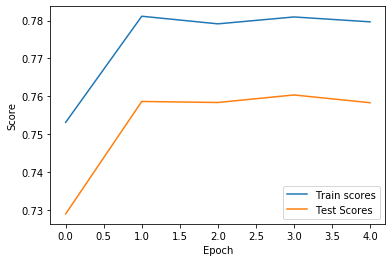

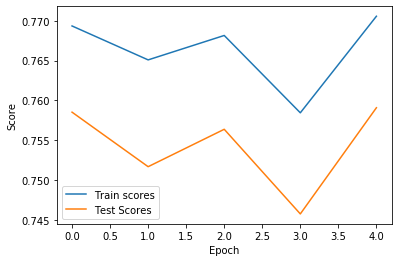

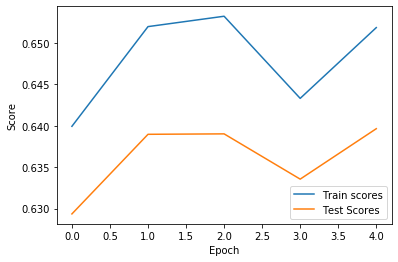

In [28]:
plotScores(full_fs_scores_train, full_fs_scores_test)
plotScores(lw_fs_scores_train, lw_fs_scores_test)
plotScores(custom_fs_scores_train, custom_fs_scores_test)

Let's pause quickly here to point out that the scores seems really unstable. A possible reason might be the learning rate is too high. However, looking at the scale, we wee that the scores vary only by about 0.02, which isn't much. Regardless, this made us think we might need more experimentation with the hyperparameters. We'll touch back on this later.  

### Prediction - MLP

In [29]:
mlp_prediction_full = full_fs_mlp.predict(X_full_test)
mlp_prediction_lw = lw_fs_mlp.predict(X_lw_test)
mlp_prediction_custom = custom_fs_mlp.predict(X_custom_test)


### Evaluate - MLP

In [30]:
mlp_full_mae = mean_absolute_error(mlp_prediction_full, y_test.values)
mlp_lw_mae = mean_absolute_error(mlp_prediction_lw, y_test.values)
mlp_custom_mae = mean_absolute_error(mlp_prediction_custom, y_test.values)

mlp_full_mse = mean_squared_error(mlp_prediction_full, y_test.values)
mlp_lw_mse = mean_squared_error(mlp_prediction_lw, y_test.values)
mlp_custom_mse = mean_squared_error(mlp_prediction_custom, y_test.values)

print("Mean absolute error for mlp method with the full feature set: ", mlp_full_mae)
print("Mean absolute error for mlp method with the lightweight feature set: ", mlp_lw_mae)
print("Mean absolute error for mlp method with the custom feature set: ", mlp_custom_mae)
print()
print("Mean squared error for mlp method with the full feature set: ", mlp_full_mse)
print("Mean squared error for mlp method with the lightweight feature set: ", mlp_lw_mse)
print("Mean squared error for mlp method with the custom feature set: ", mlp_custom_mse)

Mean absolute error for mlp method with the full feature set:  5.284411365789032
Mean absolute error for mlp method with the lightweight feature set:  5.32112439576768
Mean absolute error for mlp method with the custom feature set:  6.35909309237471

Mean squared error for mlp method with the full feature set:  45.397890628873704
Mean squared error for mlp method with the lightweight feature set:  45.25597450803258
Mean squared error for mlp method with the custom feature set:  67.68942390267436


### Experimenting with hyperparameters - MLP

We mentioned earlier that we want to experiment with hyperparameters. We started by doing some quick research on MLP topoligy and hyperparameters. Most source said that it would be overkill to have a great number of layers with hundreds of nodes. So we played around with 1-3 layers and 50-100 nodes. We also experimented with different values of hyperparameters based on what we learned in class. All this experimentaition isn't documented because results were always fairly similar and the notebook would be bloated.  

So we decided to bruto force this by trying a lot of combinations. Fortunatly, scikit gives good tools for this. We'll use GridSearchCV to easily test many hyperparameter combinations and see if we can achieve better results.  

GridSearchCV takes a param_grid as parameters. This specifies what hyperparameters values to try. The function will then perform a grid search using all the provided values in param_grid. This means all possible combinations of parameter values will be evaluated and it will keep the best one. We will be using the default scoring function (sklearn.metrics.r2_score) to evaluate which combination is the best.

In [31]:
from sklearn.model_selection import GridSearchCV
import pickle

In [32]:
parameter_space_mlp = {
    'hidden_layer_sizes': [(50,), (75,), (100,), (100, 50), (100, 50, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'max_iter': [100, 200],
}

In [33]:
# looking for the file beforehand as it took a loong time to build grid
try:
    grid_full_fs_mlp = pickle.load(open("grid_full_fs_mlp.pickle", "rb"))
except (OSError, IOError) as e:

    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_full_fs_mlp = GridSearchCV(full_fs_mlp, parameter_space_mlp, n_jobs=-1, cv=3)
    grid_full_fs_mlp.fit(X_full_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    
    pickle.dump(grid_full_fs_mlp, open("grid_full_fs_mlp.pickle", "wb"))

In [34]:
# looking for the file beforehand as it took a loong time to build grid
try:
    grid_lw_fs_mlp = pickle.load(open("grid_lw_fs_mlp.pickle", "rb"))
except (OSError, IOError) as e:

    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_lw_fs_mlp = GridSearchCV(lw_fs_mlp, parameter_space_mlp, n_jobs=-1, cv=3)
    grid_lw_fs_mlp.fit(X_lw_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    
    pickle.dump(grid_lw_fs_mlp, open("grid_lw_fs_mlp.pickle", "wb"))

In [35]:
# looking for the file beforehand as it took a loong time to build grid
try:
    grid_custom_fs_mlp = pickle.load(open("grid_custom_fs_mlp.pickle", "rb"))
except (OSError, IOError) as e:

    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_custom_fs_mlp = GridSearchCV(custom_fs_mlp, parameter_space_mlp, n_jobs=-1, cv=3)
    grid_custom_fs_mlp.fit(X_custom_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    
    pickle.dump(grid_custom_fs_mlp, open("grid_custom_fs_mlp.pickle", "wb"))

Before checking results, we'll wee what paramater we ended up with.

In [36]:
print("Best hyperparameters found for MLP with full feature set: ")
print(grid_full_fs_mlp.best_params_)
print()

print("Best hyperparameters found for MLP with lightweight feature set: ")
print(grid_lw_fs_mlp.best_params_)
print()

print("Best hyperparameters found for MLP with custom feature set: ")
print(grid_custom_fs_mlp.best_params_)
print()

Best hyperparameters found for MLP with full feature set: 
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (75,), 'learning_rate_init': 0.0001, 'max_iter': 200, 'solver': 'adam'}

Best hyperparameters found for MLP with lightweight feature set: 
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 10), 'learning_rate_init': 0.01, 'max_iter': 100, 'solver': 'adam'}

Best hyperparameters found for MLP with custom feature set: 
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 10), 'learning_rate_init': 0.01, 'max_iter': 100, 'solver': 'adam'}



And now we can see what mae and mse we get with these new parameters.

In [37]:
grid_full_fs_mlp_prediction = grid_full_fs_mlp.predict(X_full_test)
grid_lw_fs_mlp_prediction = grid_lw_fs_mlp.predict(X_lw_test)
grid_custom_fs_mlp_prediction = grid_custom_fs_mlp.predict(X_custom_test)

grid_mlp_full_mae = mean_absolute_error(grid_full_fs_mlp_prediction, y_test.values)
grid_mlp_full_mse = mean_squared_error(grid_full_fs_mlp_prediction, y_test.values)
grid_mlp_lw_mae = mean_absolute_error(grid_lw_fs_mlp_prediction, y_test.values)
grid_mlp_lw_mse = mean_squared_error(grid_lw_fs_mlp_prediction, y_test.values)
grid_mlp_custom_mae = mean_absolute_error(grid_custom_fs_mlp_prediction, y_test.values)
grid_mlp_custom_mse = mean_squared_error(grid_custom_fs_mlp_prediction, y_test.values)

print("Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with full feature set: ", grid_mlp_full_mae)
print("Mean squared error for MLP with GridSearchCV discovered hyperparamterers with full feature set: ", grid_mlp_full_mse)
print()
print("Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with lightweight feature set: ", grid_mlp_lw_mae)
print("Mean squared error for MLP with GridSearchCV discovered hyperparamterers with lightweight feature set: ", grid_mlp_lw_mse)
print()
print("Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with custom feature set: ", grid_mlp_custom_mae)
print("Mean squared error for MLP with GridSearchCV discovered hyperparamterers with custom feature set: ", grid_mlp_custom_mse)
print()

Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with full feature set:  5.259788983178779
Mean squared error for MLP with GridSearchCV discovered hyperparamterers with full feature set:  45.24287789259894

Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with lightweight feature set:  5.467561777797228
Mean squared error for MLP with GridSearchCV discovered hyperparamterers with lightweight feature set:  47.59736450821153

Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with custom feature set:  6.3435316980001915
Mean squared error for MLP with GridSearchCV discovered hyperparamterers with custom feature set:  67.89132546620787



## Another dataset

This may seem out of place, but the idea for this dataset came from earlier experiments. We noticed that the basic method performs better with monthly data (custom dataset, the third one), but our MLP models perform better with the season data.  

After talking with Professor Caroline Barrière, she proposed that we could try combining season and month data since they both seem to offer some value.  

In [38]:
X_big_train = X_lw_train.copy()
X_big_test = X_lw_test.copy() 
tmp_X_month_data_train = X_custom_train.copy()
tmp_X_month_data_test = X_custom_test.copy()

# Pop duplicate before merge
tmp_X_month_data_train.pop('Home')
tmp_X_month_data_test.pop('Home')

X_big_train = pd.concat([X_big_train.reset_index(drop=True), tmp_X_month_data_train.reset_index(drop=True)], axis=1)
X_big_test = pd.concat([X_big_test.reset_index(drop=True), tmp_X_month_data_test.reset_index(drop=True)], axis=1)


And now we'll do pretty much the same as we just did with the other datasets and MLPRegressor

In [39]:
big_fs_mlp = MLPRegressor()

In [40]:
# looking for the file beforehand as it took a loong time to build grid
try:
    grid_big_fs_mlp = pickle.load(open("grid_big_fs_mlp.pickle", "rb"))
except (OSError, IOError) as e:

    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_big_fs_mlp = GridSearchCV(big_fs_mlp, parameter_space_mlp, n_jobs=-1, cv=3)
    grid_big_fs_mlp.fit(X_big_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    
    pickle.dump(grid_big_fs_mlp, open("grid_big_fs_mlp.pickle", "wb"))

In [41]:
print("Best hyperparameters found for MLP with big feature set: ")
print(grid_big_fs_mlp.best_params_)
print()

grid_big_fs_mlp_prediction = grid_big_fs_mlp.predict(X_big_test)

grid_mlp_big_mae = mean_absolute_error(grid_big_fs_mlp_prediction, y_test.values)
grid_mlp_big_mse = mean_squared_error(grid_big_fs_mlp_prediction, y_test.values)


print("Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with big feature set: ", grid_mlp_big_mae)
print("Mean squared error for MLP with GridSearchCV discovered hyperparamterers with big feature set: ", grid_mlp_big_mse)


Best hyperparameters found for MLP with big feature set: 
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}

Mean absolute error for MLP with GridSearchCV discovered hyperparamterers with big feature set:  4.909419561395034
Mean squared error for MLP with GridSearchCV discovered hyperparamterers with big feature set:  39.887917632102116


## Regression Decision Tree

Next, we'll train a regression tree and use it to predict fantasy scores. We will use the same four versions of the dataset and the same training data split: X_full_train, X_full_test, X_lw_train, X_lw_test, X_custom_train, X_custom_test, y_train, y_test.  

Since the depth of a regression decision tree can reach N -1 (where N is the number of element in the dataset). That is because the least effective split will only remove one element for every decision. This is obviously not what we want and we will need to set a max_depth so the tree doesn't get too big.

According to our research, leaving the default value of min_samples_leaf to 1 will lead to overfitting, so we are using the recommanded value of 20.

In [42]:
from sklearn.tree import DecisionTreeRegressor  

full_fs_rtree = DecisionTreeRegressor(random_state = 0, max_depth=100, min_samples_leaf=20)
lw_fs_rtree = DecisionTreeRegressor(random_state = 0, max_depth=100, min_samples_leaf=20)
custom_fs_rtree = DecisionTreeRegressor(random_state = 0, max_depth=100, min_samples_leaf=20)
big_fs_rtree = DecisionTreeRegressor(random_state = 0, max_depth=100, min_samples_leaf=20)

In [43]:
rtree_full = full_fs_rtree.fit(X_full_train, y_train)
rtree_lw = lw_fs_rtree.fit(X_lw_train, y_train)
rtree_custom = custom_fs_rtree.fit(X_custom_train, y_train)
rtree_big = big_fs_rtree.fit(X_big_train, y_train)

### Prediction - Regression Tree

In [44]:
rtree_prediction_full = rtree_full.predict(X_full_test)
rtree_prediction_lw = rtree_lw.predict(X_lw_test)
rtree_prediction_custom = rtree_custom.predict(X_custom_test)
rtree_prediction_big = rtree_big.predict(X_big_test)

### Evaluate - Regression Tree

In [45]:
rtree_full_mae = mean_absolute_error(rtree_prediction_full, y_test.values)
rtree_lw_mae = mean_absolute_error(rtree_prediction_lw, y_test.values)
rtree_custom_mae = mean_absolute_error(rtree_prediction_custom, y_test.values)
rtree_big_mae = mean_absolute_error(rtree_prediction_big, y_test.values)

rtree_full_mse = mean_squared_error(rtree_prediction_full, y_test.values)
rtree_lw_mse = mean_squared_error(rtree_prediction_lw, y_test.values)
rtree_custom_mse = mean_squared_error(rtree_prediction_custom, y_test.values)
rtree_big_mse = mean_squared_error(rtree_prediction_big, y_test.values)

print("Mean absolute error for regression tree method with the full feature set: ", rtree_full_mae)
print("Mean absolute error for regression tree method with the lightweight feature set: ", rtree_lw_mae)
print("Mean absolute error for regression tree method with the custom feature set: ", rtree_custom_mae)
print("Mean absolute error for regression tree method with the big feature set: ", rtree_big_mae)
print()
print("Mean squared error for regression tree method with the full feature set: ", rtree_full_mse)
print("Mean squared error for regression tree method with the lightweight feature set: ", rtree_lw_mse)
print("Mean squared error for regression tree method with the custom feature set: ", rtree_custom_mse)
print("Mean squared error for regression tree method with the big feature set: ", rtree_big_mse)

Mean absolute error for regression tree method with the full feature set:  5.350993452596414
Mean absolute error for regression tree method with the lightweight feature set:  5.400571841879198
Mean absolute error for regression tree method with the custom feature set:  6.900403532113224
Mean absolute error for regression tree method with the big feature set:  5.310463523260205

Mean squared error for regression tree method with the full feature set:  47.6369509545768
Mean squared error for regression tree method with the lightweight feature set:  48.627087096497284
Mean squared error for regression tree method with the custom feature set:  81.73344586354047
Mean squared error for regression tree method with the big feature set:  47.639529938216654


### Experimenting with hyperparameters - Regression Tree

From our research, we found that the max_depth, min_samples_split and min_samples_leaf are the parameters that have the most influence on the accuracy of the model.  

As explained above, a 'min_samples_leaf' too low will lead to overfitting. We want to try some values around the 20 that is recommanded. A float value means that the value of 'min_samples_leaf' will be a fraction of the total dataset: ceil(min_samples_leaf * n_samples).  

'max_depth' is used to limit the depth of the tree. Like we mentionned in the One-hot encoding section of the report, the one-hot encoding in the dataset can lead to a deep tree. We want to try to limit that depth and see if it can help to make the tree more accurate.  

'min_samples_split' is the minimum number of element in a node required to split it. It is closely linked to 'min_samples_leaf' and both will have a similar effect of smoothing out the tree to prevent overfitting when the correct value is used. The float value work the same as with 'min_samples_leaf'.

'splitter' will decide how an attribute from the dataset is selected to do the split on a node in the tree. If 'best' is used, the attribute is chosen will always be the best according to the algorithm (see section 'Construction de l’arbre' of the report). If 'random' is used, a random attribute from the dataset is selected for each split. Usually, using random is less computationally intensive and can be less prone to overfitting.  

'criterion' is the function to mesure the quality of a split.  'mse' is the mean squared error, 'friedman_mse' is the mean squared error with Friedman’s improvement score and 'mae' is the mean absolute error.  
  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html  
https://discuss.analyticsvidhya.com/t/what-does-min-samples-split-means-in-decision-tree/6233/3  
https://stackoverflow.com/questions/46756606/what-does-splitter-attribute-in-sklearns-decisiontreeclassifier-do  

In [46]:
parameter_space_rtree = {
    'criterion': ['mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [10,100,None],
    'min_samples_split': [2,20,0.2],
    'min_samples_leaf': [2,10,0.01,0.1]
}

In [52]:
try:
    grid_full_fs_rtree = pickle.load(open("grid_full_fs_rtree.pickle", "rb"))
except (ValueError) as e:
    #Seems like serialization varies between platforms, so we included two versions from two machines.
    print("Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.")
    grid_full_fs_rtree = pickle.load(open("grid_full_fs_rtree_v2.pickle", "rb"))
except (OSError, IOError) as e:
    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_full_fs_rtree = GridSearchCV(full_fs_rtree, parameter_space_rtree, n_jobs=-1, cv=3)
    grid_full_fs_rtree = grid_full_fs_rtree.fit(X_full_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    pickle.dump(grid_full_fs_rtree, open("grid_full_fs_rtree.pickle", "wb"))

Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.


In [53]:
try:
    grid_lw_fs_rtree = pickle.load(open("grid_lw_fs_rtree.pickle", "rb"))
except (ValueError) as e:
    #Seems like serialization varies between platforms, so we included two versions from two machines.
    print("Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.")
    grid_lw_fs_rtree = pickle.load(open("grid_lw_fs_rtree_v2.pickle", "rb"))
except (OSError, IOError) as e:
    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_lw_fs_rtree = GridSearchCV(lw_fs_rtree, parameter_space_rtree, n_jobs=-1, cv=3)
    grid_lw_fs_rtree = grid_lw_fs_rtree.fit(X_lw_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    pickle.dump(grid_lw_fs_rtree, open("grid_lw_fs_rtree.pickle", "wb"))

Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.


In [54]:
try:
    grid_custom_fs_rtree = pickle.load(open("grid_custom_fs_rtree.pickle", "rb"))
except (ValueError) as e:
    #Seems like serialization varies between platforms, so we included two versions from two machines.
    print("Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.")
    grid_custom_fs_rtree = pickle.load(open("grid_custom_fs_rtree_v2.pickle", "rb"))
except (OSError, IOError) as e:
    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_custom_fs_rtree = GridSearchCV(custom_fs_rtree, parameter_space_rtree, n_jobs=-1, cv=3)
    grid_custom_fs_rtree = grid_custom_fs_rtree.fit(X_custom_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    pickle.dump(grid_custom_fs_rtree, open("grid_custom_fs_rtree.pickle", "wb"))

Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.


In [55]:
try:
    grid_big_fs_rtree = pickle.load(open("grid_big_fs_rtree.pickle", "rb"))
except (ValueError) as e:
    #Seems like serialization varies between platforms, so we included two versions from two machines.
    print("Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.")
    grid_big_fs_rtree = pickle.load(open("grid_big_fs_rtree_v2.pickle", "rb"))
except (OSError, IOError) as e:
    print("Start optimisation:" + str(datetime.datetime.now()))
    grid_big_fs_rtree = GridSearchCV(big_fs_rtree, parameter_space_rtree, n_jobs=-1, cv=3)
    grid_big_fs_rtree = grid_big_fs_rtree.fit(X_big_train, y_train)
    print("End optimisation:" + str(datetime.datetime.now()))
    pickle.dump(grid_big_fs_rtree, open("grid_big_fs_rtree.pickle", "wb"))

Problem reading the grid_full_fs_rtree.pickle. Will try the v2 version.


We can check what parameters the optimization found to be the most effective

In [56]:
print("Best hyperparameters found for MLP with full feature set: ")
print(grid_full_fs_rtree.best_params_)
print()

print("Best hyperparameters found for MLP with lightweight feature set: ")
print(grid_lw_fs_rtree.best_params_)
print()

print("Best hyperparameters found for MLP with custom feature set: ")
print(grid_custom_fs_rtree.best_params_)
print()

print("Best hyperparameters found for MLP with custom feature set: ")
print(grid_big_fs_rtree.best_params_)
print()

Best hyperparameters found for MLP with full feature set: 
{'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'splitter': 'best'}

Best hyperparameters found for MLP with lightweight feature set: 
{'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'splitter': 'best'}

Best hyperparameters found for MLP with custom feature set: 
{'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'splitter': 'best'}

Best hyperparameters found for MLP with custom feature set: 
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'splitter': 'best'}



### Prediction with Optimized Model - Regression Tree

In [57]:
rtree_opt_prediction_full = grid_full_fs_rtree.predict(X_full_test)
rtree_opt_prediction_lw = grid_lw_fs_rtree.predict(X_lw_test)
rtree_opt_prediction_custom = grid_custom_fs_rtree.predict(X_custom_test)
rtree_opt_prediction_big = grid_big_fs_rtree.predict(X_big_test)

rtree_opt_full_mae = mean_absolute_error(rtree_opt_prediction_full, y_test.values)
rtree_opt_lw_mae = mean_absolute_error(rtree_opt_prediction_lw, y_test.values)
rtree_opt_custom_mae = mean_absolute_error(rtree_opt_prediction_custom, y_test.values)
rtree_opt_big_mae = mean_absolute_error(rtree_opt_prediction_big, y_test.values)

rtree_opt_full_mse = mean_squared_error(rtree_opt_prediction_full, y_test.values)
rtree_opt_lw_mse = mean_squared_error(rtree_opt_prediction_lw, y_test.values)
rtree_opt_custom_mse = mean_squared_error(rtree_opt_prediction_custom, y_test.values)
rtree_opt_big_mse = mean_squared_error(rtree_opt_prediction_big, y_test.values)

print("Mean absolute error for optimized regression tree method with the full feature set: ", rtree_opt_full_mae)
print("Mean absolute error for optimized regression tree method with the lightweight feature set: ", rtree_opt_lw_mae)
print("Mean absolute error for optimized regression tree method with the custom feature set: ", rtree_opt_custom_mae)
print("Mean absolute error for optimized regression tree method with the big feature set: ", rtree_opt_big_mae)
print()
print("Mean squared error for optimized regression tree method with the full feature set: ", rtree_opt_full_mse)
print("Mean squared error for optimized regression tree method with the lightweight feature set: ", rtree_opt_lw_mse)
print("Mean squared error for optimized regression tree method with the custom feature set: ", rtree_opt_custom_mse)
print("Mean squared error for optimized regression tree method with the big feature set: ", rtree_opt_big_mse)

Mean absolute error for optimized regression tree method with the full feature set:  5.345555704129279
Mean absolute error for optimized regression tree method with the lightweight feature set:  5.319207736578999
Mean absolute error for optimized regression tree method with the custom feature set:  6.715197452056305
Mean absolute error for optimized regression tree method with the big feature set:  5.074196516457412

Mean squared error for optimized regression tree method with the full feature set:  46.24443132959062
Mean squared error for optimized regression tree method with the lightweight feature set:  45.95117979075863
Mean squared error for optimized regression tree method with the custom feature set:  75.40059625630768
Mean squared error for optimized regression tree method with the big feature set:  42.488982310488296


### Exporting the trees

It is possible to export the tree to a graphvix dot format. We are then going to convert these into png to take a look at the layout of the trees.

In [58]:
from sklearn import tree

full_tree_dot = tree.export_graphviz(rtree_full)
print(full_tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.5\nmse = 200.94\nsamples = 20395\nvalue = 21.103"] ;
1 [label="X[48] <= 2.15\nmse = 47.725\nsamples = 10597\nvalue = 10.992"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[68] <= 1.05\nmse = 36.727\nsamples = 4292\nvalue = 7.634"] ;
1 -> 2 ;
3 [label="X[63] <= 0.85\nmse = 24.42\nsamples = 1350\nvalue = 4.995"] ;
2 -> 3 ;
4 [label="X[52] <= 0.75\nmse = 10.844\nsamples = 299\nvalue = 2.48"] ;
3 -> 4 ;
5 [label="X[49] <= 1.15\nmse = 7.001\nsamples = 204\nvalue = 1.893"] ;
4 -> 5 ;
6 [label="X[43] <= 4.75\nmse = 3.805\nsamples = 114\nvalue = 1.406"] ;
5 -> 6 ;
7 [label="X[0] <= 0.5\nmse = 5.26\nsamples = 60\nvalue = 1.758"] ;
6 -> 7 ;
8 [label="mse = 5.288\nsamples = 33\nvalue = 2.371"] ;
7 -> 8 ;
9 [label="mse = 4.206\nsamples = 27\nvalue = 1.009"] ;
7 -> 9 ;
10 [label="X[27] <= 86.7\nmse = 1.897\nsamples = 54\nvalue = 1.014"] ;
6 -> 10 ;
11 [label="mse = 0.822\nsamples = 33\nvalue = 0.636"] ;
10 -> 11 ;
1

In [59]:
lw_tree_dot = tree.export_graphviz(rtree_lw)
print(lw_tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.5\nmse = 200.94\nsamples = 20395\nvalue = 21.103"] ;
1 [label="X[36] <= 2.15\nmse = 47.725\nsamples = 10597\nvalue = 10.992"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[49] <= 1.05\nmse = 36.727\nsamples = 4292\nvalue = 7.634"] ;
1 -> 2 ;
3 [label="X[44] <= 0.85\nmse = 24.42\nsamples = 1350\nvalue = 4.995"] ;
2 -> 3 ;
4 [label="X[39] <= 0.75\nmse = 10.844\nsamples = 299\nvalue = 2.48"] ;
3 -> 4 ;
5 [label="X[37] <= 1.15\nmse = 7.001\nsamples = 204\nvalue = 1.893"] ;
4 -> 5 ;
6 [label="X[31] <= 4.75\nmse = 3.805\nsamples = 114\nvalue = 1.406"] ;
5 -> 6 ;
7 [label="X[0] <= 0.5\nmse = 5.26\nsamples = 60\nvalue = 1.758"] ;
6 -> 7 ;
8 [label="mse = 5.288\nsamples = 33\nvalue = 2.371"] ;
7 -> 8 ;
9 [label="mse = 4.206\nsamples = 27\nvalue = 1.009"] ;
7 -> 9 ;
10 [label="X[21] <= 86.7\nmse = 1.897\nsamples = 54\nvalue = 1.014"] ;
6 -> 10 ;
11 [label="mse = 0.822\nsamples = 33\nvalue = 0.636"] ;
10 -> 11 ;
1

In [60]:
custom_tree_dot = tree.export_graphviz(rtree_custom)
print(custom_tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="X[5] <= 3.95\nmse = 200.94\nsamples = 20395\nvalue = 21.103"] ;
1 [label="X[4] <= 5.45\nmse = 87.161\nsamples = 11975\nvalue = 13.706"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 12.05\nmse = 47.515\nsamples = 4988\nvalue = 8.445"] ;
1 -> 2 ;
3 [label="X[4] <= 2.25\nmse = 33.356\nsamples = 2316\nvalue = 5.58"] ;
2 -> 3 ;
4 [label="X[16] <= 1.15\nmse = 14.35\nsamples = 970\nvalue = 3.276"] ;
3 -> 4 ;
5 [label="X[4] <= 0.75\nmse = 9.054\nsamples = 670\nvalue = 2.531"] ;
4 -> 5 ;
6 [label="X[16] <= 0.35\nmse = 2.872\nsamples = 244\nvalue = 1.392"] ;
5 -> 6 ;
7 [label="X[43] <= 31.4\nmse = 2.1\nsamples = 125\nvalue = 0.92"] ;
6 -> 7 ;
8 [label="X[52] <= 14.25\nmse = 1.111\nsamples = 94\nvalue = 0.644"] ;
7 -> 8 ;
9 [label="X[44] <= 0.368\nmse = 0.783\nsamples = 50\nvalue = 0.325"] ;
8 -> 9 ;
10 [label="mse = 1.132\nsamples = 29\nvalue = 0.612"] ;
9 -> 10 ;
11 [label="mse = 0.031\nsamples = 21\nvalue = -0.071

## Discussion

In [61]:
from prettytable import PrettyTable

In [62]:
print("Basic method with Grid Search performances")
mlp_table = PrettyTable(["Metric", "Full", "Lightweight", "Custom", "Big"])
mlp_table.add_row(["mae", basic_full_mae, basic_lw_mae, basic_custom_mae, "N/A"])
mlp_table.add_row(["mse", basic_full_mse, basic_lw_mse, basic_custom_mse, "N/A"])
print(mlp_table)

print("MLP with Grid Search performances")
mlp_table = PrettyTable(["Metric", "Full", "Lightweight", "Custom", "Big"])
mlp_table.add_row(["mae", grid_mlp_full_mae, grid_mlp_lw_mae, grid_mlp_custom_mae, grid_mlp_big_mae])
mlp_table.add_row(["mse", grid_mlp_full_mse, grid_mlp_lw_mse, grid_mlp_custom_mse, grid_mlp_big_mse])
print(mlp_table)

print("Regression Tree with Grid Search performances")
rt_table = PrettyTable(["Metric", "Full", "Lightweight", "Custom", "Big"])
rt_table.add_row(["mae", rtree_opt_full_mae, rtree_opt_lw_mae, rtree_opt_custom_mae, rtree_opt_big_mae])
rt_table.add_row(["mse", rtree_opt_full_mse, rtree_opt_lw_mse, rtree_opt_custom_mse, rtree_opt_big_mse])
print(rt_table)

Basic method with Grid Search performances
+--------+--------------------+--------------------+-------------------+-----+
| Metric |        Full        |    Lightweight     |       Custom      | Big |
+--------+--------------------+--------------------+-------------------+-----+
|  mae   | 7.0165767797607375 | 7.0165767797607375 | 6.357570111786625 | N/A |
|  mse   | 80.41135945773681  | 80.41135945773681  | 67.73900838399686 | N/A |
+--------+--------------------+--------------------+-------------------+-----+
MLP with Grid Search performances
+--------+-------------------+-------------------+--------------------+--------------------+
| Metric |        Full       |    Lightweight    |       Custom       |        Big         |
+--------+-------------------+-------------------+--------------------+--------------------+
|  mae   | 5.259788983178779 | 5.467561777797228 | 6.3435316980001915 | 4.909419561395034  |
|  mse   | 45.24287789259894 | 47.59736450821153 | 67.89132546620787  | 39.88

Now that we have all of the results, we can analyze them and see if we can spot interesting facts.  

First, we see that the Custom dataset performs better than the other dataset when it comes to the basic method. This seems like an early indication that the Custom feature set offers better performance, or at least that monthly data has some value. However, this is flipped when it comes to the machine learning models. We think a possible reason might be that machine learning methods use all the features of the dataset, while basic method only uses the player's statistics. It could be that the features only used in the ML models (mostly team statistics) are not good predictors when using monthly averages compared to using season averages.  

Second, we see that our machine learning models perform better than our basic approach when it comes to the Full, Lightweight  and Big datasets. This a a great sign that we are not wasting our time with machine learning models and that they do offer some value over just using a player's average stats to predict his performance.  

Third, we can observe that the performances between the Full and Lightweight datasets are very similar. This is a great sign that our feature engineering worked. The attributes we judged optional or derived do indeed seem to add little value to our models. However, we also wanted to have the Lightweight dataset because we thought it was more generalisable, but we did not verify it. More on this in the conclusion.  

Fourth, one of our goals was to compare both models, MLP regressor and Regression Tree. We see that after optimization, both models seem to offer roughly the same results. Furthermore, even time to fit was very similar from our qualitative observations. We'd be interested to test other models, but this similarity leads us to the observation we find the most interesting.  

Finally, if we consider that
- performance between the models were very similar
- performance of the Full and Lightweight dataset were very similar
- the Big dataset (combining season and month statistics) is slightly better than other datasets  

We think that the obvious conclusion is that, at the core of all this, it's the data that matters. Different models may lead to slight improvements, but the bigggest contributor to the quality of the predictions is the amount and the quality of the data we are basing the models on.

## Conclusion

Now that all the work is done, we can reflect on the overall conclusion of this project. If we had one thing to take away, it would probably be the importance of data, which is not surprising considering it almost a catchphrase in the computer science world at this point.  

When it comes to what we could have done better or what we would have liked to do but didn't have the time, there is quite a bit to say.  

First, we believe that our dataset wasn't as good a representation of the context as it should have been. We include evey game for every player in our datasets. While this is an accurate representation of an NBA season, it's not an appropriate representation of a fantasy team. It's very rare that the 14th man on a NBA roster is used in a fantasy team. SO including such players muddies the dataset for nothing. We did actually play around with cutting all rows of the dataset with very low fantasy scores, but this is too heavy handed. A good way would have been to remove all the players that had low season averages for playing time.  

Second, we would have loved to test our models agains test data taken from the 2018-2019 or 2019-2020 seasons. Some of our feature engineering was done to have models that would generlize across seasons. For example, the Full dataset uses the team names as parameters (one-hot). However, playing against Miami in 2017-2018 is not the same as playing against Miami in 2019-2020. For this reason, we hoped out Lightweight dataset would generalize better. We unfortunatly did not have the time to fetch relevant test data to accomplish our goal.

Third, all of our feature engineering was based on our domain expertise (well, as much as a fan can be considered an expert). It would have been interesting to do a correlation analysis between the features and the fantasy score (value to predict). This might have helped us really identify the relevant features.  

Finally, we wanted to compare our models to other prediction websites. This had no real analytical value, but it would have been a fun comparison.

## References

Here are all the references we used for this notebook. It should help understand any code that isn't clear or the the justifications behind some decisions.

- https://www.youtube.com/watch?v=g9c66TUylZ4 (statquest)
- https://datascience.stackexchange.com/questions/5226/strings-as-features-in-decision-tree-random-forest 
- https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
- https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/
- http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple
- https://stackoverflow.com/questions/21954197/which-is-the-fastest-way-to-extract-day-month-and-year-from-a-given-date
- https://www.geeksforgeeks.org/get-post-requests-using-python/
- https://stackoverflow.com/questions/16511337/correct-way-to-try-except-using-python-requests-module
- https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
- https://stackoverflow.com/questions/47655296/pandas-merge-two-datasets-with-same-number-of
- https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
- https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
- https://scikit-learn.org/stable/modules/model_persistence.html
- https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
- https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/grid_search.html
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
- https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
- https://towardsdatascience.com/selecting-the-best-machine-learning-algorithm-for-your-regression-problem-20c330bad4ef
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://discuss.analyticsvidhya.com/t/what-does-min-samples-split-means-in-decision-tree/6233/3
- https://stackoverflow.com/questions/46756606/what-does-splitter-attribute-in-sklearns-decisiontreeclassifier-do
